#### 13. Image transformation (Binaryzation)

특정값을 기준으로 흰색과 검은색만으로 나눔

In [4]:
import cv2

img = cv2.imread('image/book.jpg', cv2.IMREAD_GRAYSCALE) # image을 grayscale로 불러옴

# 불러온 image을 기준(127)에 따라 흰색, 검은색으로 변경
ret, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

cv2.imshow('img', img)
cv2.imshow('binary', binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Trackbar(값 변화에 다른 변형 확인)

In [3]:
import cv2

# trackbar 이벤트처리 함수 생성
def empty(pos):
    # print(pos)
    pass

img = cv2.imread('image/book.jpg', cv2.IMREAD_GRAYSCALE)

# trackbar 윈도우이름 설정
name = 'Trackbar'
cv2.namedWindow(name)

# trackbar 생성
cv2.createTrackbar('threshold', name, 127, 255, empty) # cv2.createTrackbar(bar이름, 창의 이름, 초기값, 최대값, 이벤트 처리)

while True:
    thresh = cv2.getTrackbarPos('threshold', name) # cv2.getTrackbarPos(bar이름, 창의 이름)
    ret, binary = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

    if not ret:
        break

    cv2.imshow(name, binary)
    
    if cv2.waitKey(1) == ord('q'):
        break

cv2.destroyAllWindows()

In [2]:
import cv2

# trackbar 이벤트처리 함수 생성
def empty(pos):
    # print(pos)
    pass

img = cv2.imread('image/threshold.png', cv2.IMREAD_GRAYSCALE)

# trackbar 윈도우이름 설정
name = 'Trackbar'
cv2.namedWindow(name)

# trackbar 생성
cv2.createTrackbar('threshold', name, 127, 255, empty)

while True:
    thresh = cv2.getTrackbarPos('threshold', name)
    ret, binary = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

    if not ret:
        break

    cv2.imshow('img', img) # 검은색 : 0, 진한 회색 : 127, 밝은 회색 : 195, 흰색 : 255
    cv2.imshow(name, binary)
    
    if cv2.waitKey(1) == ord('q'):
        break

cv2.destroyAllWindows()

In [1]:
import cv2

img = cv2.imread('image/threshold.png', cv2.IMREAD_GRAYSCALE)

ret, binary_1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY) # binary_1의 임계값 0을 초과하는 부분은 흰색으로 변경
ret, binary_2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) # binary_2의 임계값 127을 초과하는 부분은 흰색으로 변경
ret, binary_3 = cv2.threshold(img, 195, 255, cv2.THRESH_BINARY) # binary_3의 임계값 195을 초과하는 부분은 흰색으로 변경

cv2.imshow('img', img)
cv2.imshow('binary_1', binary_1)
cv2.imshow('binary_2', binary_2)
cv2.imshow('binary_3', binary_3)

cv2.waitKey(0)
cv2.destroyAllWindows()

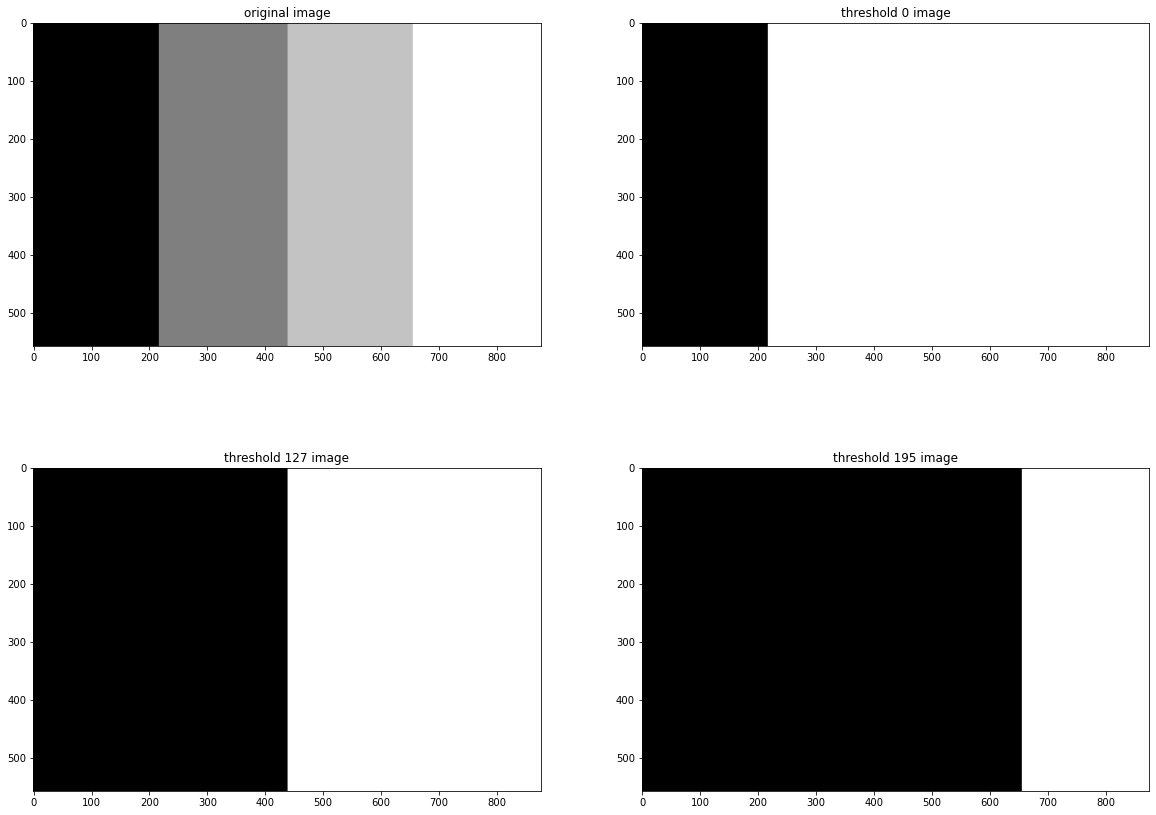

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image/threshold.png', cv2.IMREAD_GRAYSCALE)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ret, binary_1 = cv2.threshold(img_rgb, 0, 255, cv2.THRESH_BINARY) # binary_1의 임계값 0을 초과하는 부분은 흰색으로 변경
ret, binary_2 = cv2.threshold(img_rgb, 127, 255, cv2.THRESH_BINARY) # binary_2의 임계값 127을 초과하는 부분은 흰색으로 변경
ret, binary_3 = cv2.threshold(img_rgb, 195, 255, cv2.THRESH_BINARY) # binary_3의 임계값 195을 초과하는 부분은 흰색으로 변경

fig = plt.figure(figsize = (20, 15))
rows = 2
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('original image')
plt.imshow(img_rgb)

ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('threshold 0 image')
plt.imshow(binary_1)

ax3 = fig.add_subplot(rows, cols, 3)
ax3.set_title('threshold 127 image')
plt.imshow(binary_2)

ax4 = fig.add_subplot(rows, cols, 4)
ax4.set_title('threshold 195 image')
plt.imshow(binary_3)

plt.show()

##### Adaptive Threshold

이미지를 작은 영역으로 세분화해서 임계치 적용

In [7]:
# Adaptive threshold

import cv2

# trackbar 이벤트처리 함수 생성
def empty(pos):
    # print(pos)
    pass

img = cv2.imread('image/book.jpg', cv2.IMREAD_GRAYSCALE)

# trackbar 윈도우이름 설정
name = 'Trackbar'
cv2.namedWindow(name)

# trackbar 생성
cv2.createTrackbar('block_size', name, 25, 100, empty) # block size는 홀수만 가능, 1보다는 큰 값
cv2.createTrackbar('c', name, 3, 10, empty) # 일반적으로 양수값 사용

while True:
    block_size = cv2.getTrackbarPos('block_size', name)
    c = cv2.getTrackbarPos('c', name)

    if block_size <= 1: # block size가 1보다 작으면 3으로 변경
        block_size = 3
    
    if block_size % 2 == 0: # block size가 짝수이면 홀수로 변경
        block_size += 1

    binary = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c)

    cv2.imshow(name, binary)
    
    if cv2.waitKey(1) == ord('q'):
        break

cv2.destroyAllWindows()


##### Otsu's Algorithm(Method)

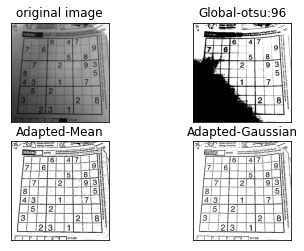

In [6]:
# Adaptive threshold & Otsu's algorithm

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('image/sudoku.png', cv2.IMREAD_GRAYSCALE)

ret, thresh_1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

thresh_2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 5)
thresh_3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 5)

# 결과 matplot으로 출력
imgs = {'original image' : img, 'Global-otsu:%d'%ret:thresh_1, 'Adapted-Mean':thresh_2, 'Adapted-Gaussian':thresh_3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([]), plt.yticks([])

plt.show()